
▶**TASK-2 : MOVIE RATING PREDICTION**

> Author: Hetanshi Acharya

> Batch: July

> Domain: Data Science









*IMPORTING IMPORTANT LIBRARIES*

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*DOWNLOADING DATASETS*


> **Movie_data**





In [ ]:
df_movie=pd.read_csv('/content/Movie_preprocessed.csv',sep="::",engine='python')
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_movie.shape

(3883, 3)

In [ ]:
df_movie.describe()

,MovieIDs,MovieName,Genre
count,3883,3883,3883
unique,3883,3883,417
top,1,Toy Story (1995),Drama
freq,1,1,585


In [ ]:
df_movie.isna().sum()

MovieIDs     0
MovieName    0
Genre        0
dtype: int64

*DOWNLOADING DATASETS*


> **ratings_data**

In [ ]:
df_ratings=pd.read_csv("/content/ratings_preprocessed.csv", sep="::", engine="python")
df_ratings.dropna(inplace=True)
df_ratings.head(10)

,UserId,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [ ]:
df_ratings.shape

(65522, 4)

In [ ]:
df_ratings.describe()

,UserId,MovieID,Ratings,Timestamp
count,65522.000000,65522.000000,65522.000000,6.552200e+04
mean,224.003709,1868.105415,3.614145,9.807067e+08
std,123.544993,1105.291118,1.114654,1.149486e+07
min,1.000000,1.000000,1.000000,9.762447e+08
25%,130.000000,1027.000000,3.000000,9.765733e+08
50%,222.000000,1806.000000,4.000000,9.771983e+08
75%,329.000000,2791.000000,4.000000,9.781040e+08
max,438.000000,3952.000000,5.000000,1.046389e+09


In [ ]:
df_ratings.isna().sum()

UserId       0
MovieID      0
Ratings      0
Timestamp    0
dtype: int64

*DOWNLOADING DATASETS*


> **Users_data**

In [ ]:
df_users=pd.read_csv("/content/users_preprocessed.csv", sep="::", engine="python")
df_users.dropna(inplace=True)
df_users.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [ ]:
df_users.shape

(6040, 5)

In [198]:
df_users.describe()

,UserID,Gender,Age,Occupation
count,6040.000000,6040.000000,6040.000000,6040.000000
mean,3020.500000,0.717053,30.639238,8.146854
std,1743.742145,0.450468,12.895962,6.329511
min,1.000000,0.000000,1.000000,0.000000
25%,1510.750000,0.000000,25.000000,3.000000
50%,3020.500000,1.000000,25.000000,7.000000
75%,4530.250000,1.000000,35.000000,14.000000
max,6040.000000,1.000000,56.000000,20.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_users['Gender']= labelencoder.fit_transform(df_users['Gender'])

df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


In [ ]:
df_users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

> ***CONCATENATING THE DATASETS***

In [ ]:
df_data=pd.concat([df_movie,df_ratings,df_users],axis=1)
df_data.dropna()
df_data.head(10)

,MovieIDs,MovieName,Genre,UserId,MovieID,Ratings,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0,10.0,48067
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
2,3,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
3,4,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
4,5,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
5,6,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117
6,7,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,1.0,35.0,1.0,06810
7,8,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,1.0,25.0,12.0,11413
8,9,Sudden Death (1995),Action,1,594,4,978302268,9.0,1.0,25.0,17.0,61614
9,10,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,0.0,35.0,1.0,95370


In [ ]:
df_data.shape

(65522, 12)

***REMOVING UNNECESSARY COLUMNS***

In [ ]:
df2=df_data.drop(["Occupation","Zip-code","Timestamp"],axis=1)
df2.head()

,MovieIDs,MovieName,Genre,UserId,MovieID,Ratings,UserID,Gender,Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
3,4,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
4,5,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0


In [ ]:
df2.describe()

,UserId,MovieID,Ratings,UserID,Gender,Age
count,65522.000000,65522.000000,65522.000000,6040.000000,6040.000000,6040.000000
mean,224.003709,1868.105415,3.614145,3020.500000,0.717053,30.639238
std,123.544993,1105.291118,1.114654,1743.742145,0.450468,12.895962
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,130.000000,1027.000000,3.000000,1510.750000,0.000000,25.000000
50%,222.000000,1806.000000,4.000000,3020.500000,1.000000,25.000000
75%,329.000000,2791.000000,4.000000,4530.250000,1.000000,35.000000
max,438.000000,3952.000000,5.000000,6040.000000,1.000000,56.000000


In [ ]:
df2.isna().sum()

MovieIDs     61639
MovieName    61639
Genre        61639
UserId           0
MovieID          0
Ratings          0
UserID       59482
Gender       59482
Age          59482
dtype: int64

***handling missing values***


In [ ]:
df_final=df2.dropna()

In [ ]:
df_final.shape

(3883, 9)

***VISULAZING THE PREPROCESSED DATA***

<Axes: xlabel='Gender', ylabel='count'>

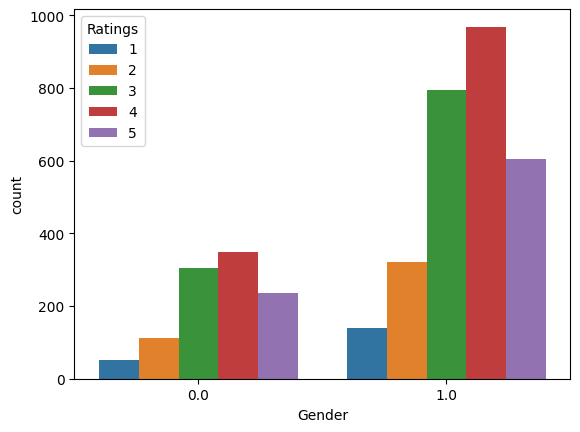

In [ ]:
sns.countplot(x=df_final['Gender'],hue=df_final['Ratings'])

Text(0.5, 0, 'Ratings')

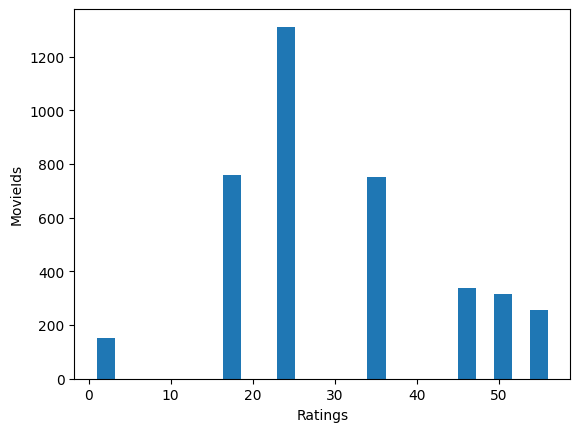

In [ ]:
df_final.Age.plot.hist(bins=25)
plt.ylabel("MovieIds")
plt.xlabel("Ratings")

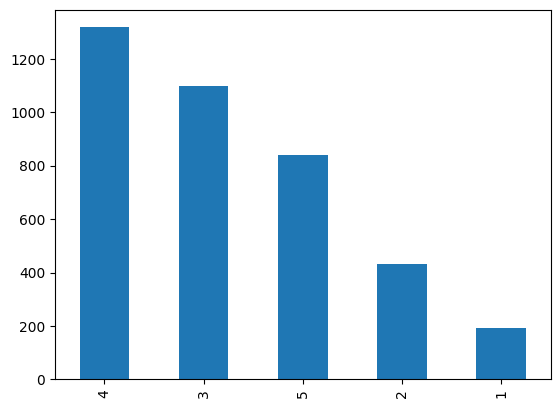

In [ ]:
df_final['Ratings'].value_counts().plot(kind='bar')
plt.show()

Text(0, 0.5, 'Ratings')

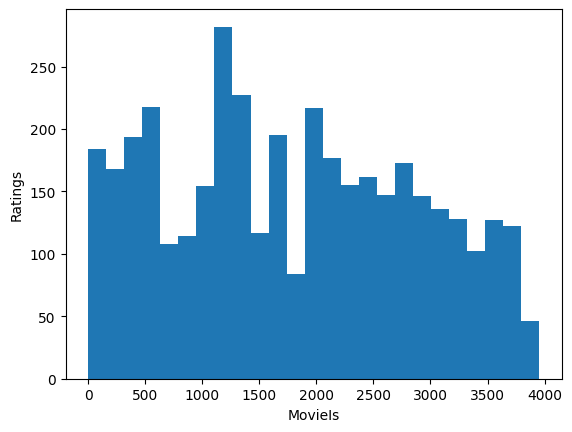

In [ ]:
df_final['MovieID'].plot.hist(bins=25)
plt.xlabel("MovieIs")
plt.ylabel("Ratings")

<Axes: ylabel='Frequency'>

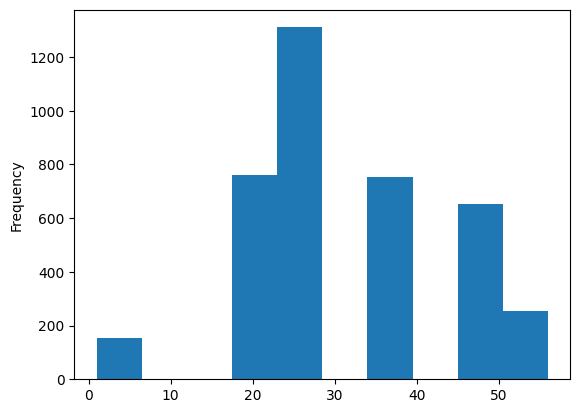

In [ ]:
df_final['Age'].plot.hist(bins=10)
# plt.xlabel("Ratings")
# plt.ylabel("Age")

<Axes: xlabel='Age', ylabel='count'>

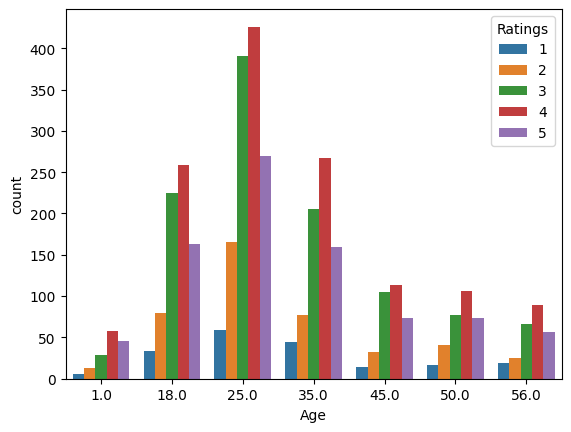

In [ ]:
sns.countplot(x=df_final['Age'],hue=df_final['Ratings'])

***FINAL DATASET***

In [ ]:
df_final.head()

,MovieIDs,MovieName,Genre,UserId,MovieID,Ratings,UserID,Gender,Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
3,4,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
4,5,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0


In [ ]:
input=df_final.drop(['Ratings','MovieName','Genre','MovieIDs'], axis=1)
target=df_final['Ratings']

In [ ]:
target.head()

,Ratings
0,5
1,3
2,3
3,4
4,5


In [ ]:
input.head()

,UserId,MovieID,UserID,Gender,Age
0,1,1193,1.0,0.0,1.0
1,1,661,2.0,1.0,56.0
2,1,914,3.0,1.0,25.0
3,1,3408,4.0,1.0,45.0
4,1,2355,5.0,1.0,25.0


***TRAINING THE MODEL USING LOGISTIC REGRESSION***

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,
                         columns=input.columns)
scaled_df.head()

,UserId,MovieID,UserID,Gender,Age
0,0.0,0.301696,0.000000,0.0,0.000000
1,0.0,0.167046,0.000258,1.0,1.000000
2,0.0,0.231081,0.000515,1.0,0.436364
3,0.0,0.862313,0.000773,1.0,0.800000
4,0.0,0.595799,0.001030,1.0,0.436364


In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(input,target,test_size=0.3)

In [ ]:
print(Y_train)

In [ ]:
print(Y_test)

In [174]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [191]:
X_test = np.array(X_test)


***MODEL PREDICTION***

In [196]:
model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4, 3, 4, ..., 4, 4, 4])